In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.abspath("../../"))
from utils import plot_functions as pf

In [3]:

data = pd.read_csv('../../data/PM4Silt/CDSSPm4silt3.csv')
params = pd.read_csv('../../data/PM4Silt/DSSPm4silt_params3.csv')


data['N'] = np.linspace(0,4,len(data['p']))
data['p_ast']=(data['sx']+data['sy'])/2
data['sxx'] = data['sx']-data['p_ast']
data['syy'] = data['sy']-data['p_ast']
data['szz'] = data['sz']-data['p_ast']
data['rxx'] = data['sxx']/data['p_ast']
data['ryy'] = data['syy']/data['p_ast']
data['rxy'] = data['sxy']/data['p_ast']
data['rzz'] = data['szz']/data['p_ast']
data['norms'] = np.sqrt(data['sxx']**2+data['syy']**2+2*data['sxy']**2)
data['q_ast'] = np.sqrt(2)*data['norms'] 

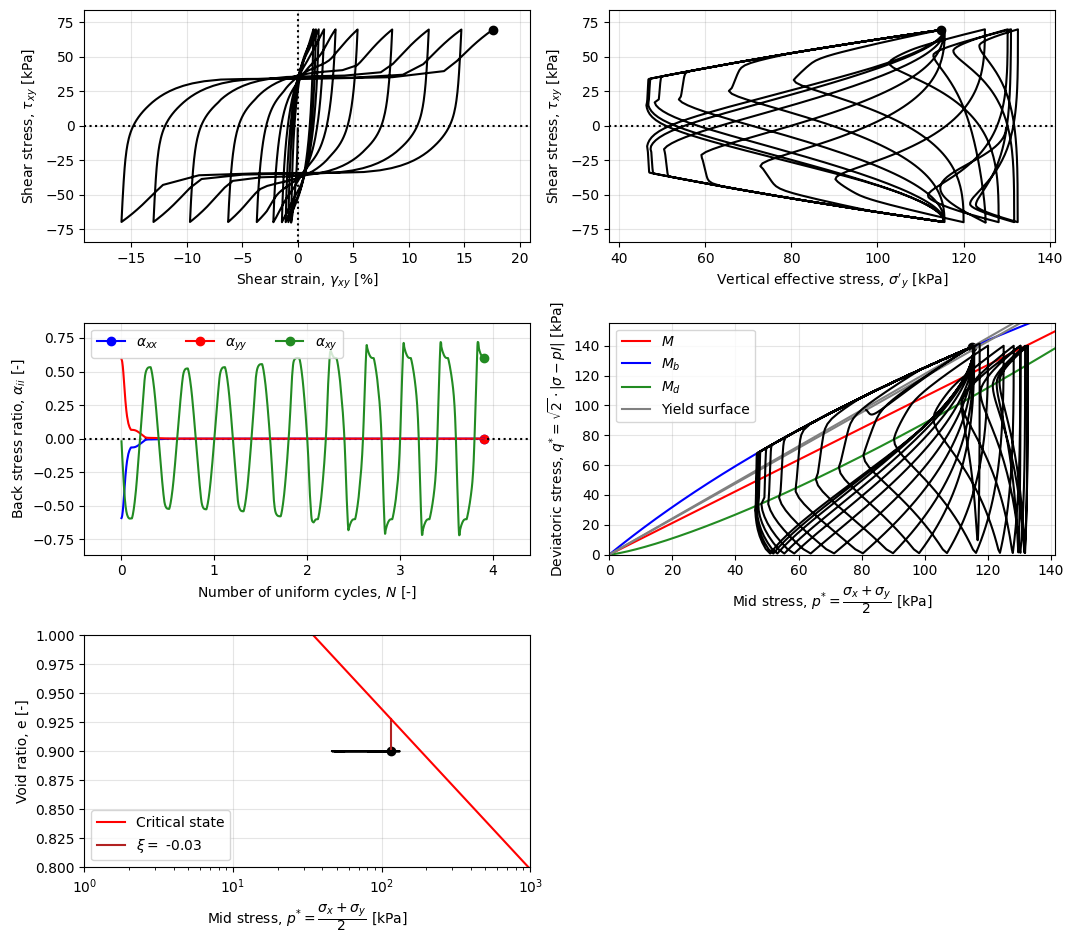

In [5]:
nx = 4
ny = 3
nidx = 1950

plt.figure(figsize=(4*nx,4*ny))

ax1 = plt.subplot2grid((nx,ny),(0,0))
pf.plot_sxy_vs_gxy(ax1,data,nidx)

ax1 = plt.subplot2grid((nx,ny),(0,1))
pf.plot_sxy_vs_sy(ax1,data,nidx)

ax1 = plt.subplot2grid((nx,ny),(1,0))
pf.plot_alpha_vs_N(ax1,data,nidx)

ax1 = plt.subplot2grid((nx,ny),(1,1))
pf.plot_q_vs_p(ax1, data,params,nidx)

ax1 = plt.subplot2grid((nx,ny),(2,0))
pf.plot_e_vs_logp(ax1, data,params,nidx,ymin=0.8,ymax=1,xmin=1,xmax=1000)
            
plt.tight_layout()